c:\Users\Praveena\myenv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


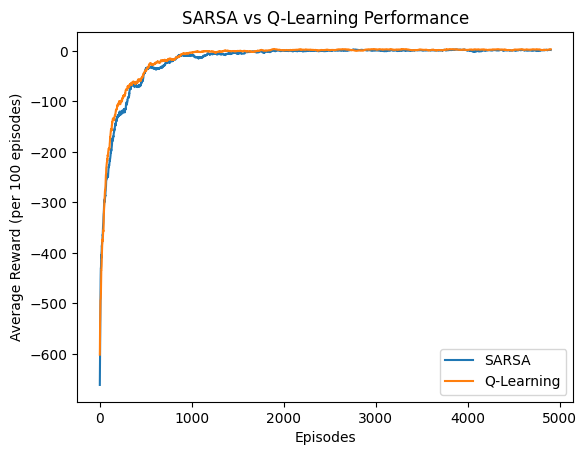

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

# Initialize Taxi Environment
env = gym.make("Taxi-v3")

# SARSA Algorithm
def sarsa(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()  # Fix for gym v26+
        action = np.random.choice(env.action_space.n) if random.uniform(0, 1) < epsilon else np.argmax(Q[state])
        total_reward = 0
        done = False

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(env.action_space.n) if random.uniform(0, 1) < epsilon else np.argmax(Q[next_state])

            # SARSA Update Rule
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state, action = next_state, next_action
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

# Q-Learning Algorithm
def q_learning(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()  # Fix for gym v26+
        total_reward = 0
        done = False

        while not done:
            action = np.random.choice(env.action_space.n) if random.uniform(0, 1) < epsilon else np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)

            # Q-Learning Update Rule
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

# Train and Compare SARSA vs Q-Learning
episodes = 5000
alpha, gamma, epsilon = 0.1, 0.9, 0.1

# Train SARSA
q_sarsa, rewards_sarsa = sarsa(env, alpha, gamma, epsilon, episodes)

# Train Q-Learning
q_qlearning, rewards_qlearning = q_learning(env, alpha, gamma, epsilon, episodes)

# Plot Performance Comparison
plt.plot(np.convolve(rewards_sarsa, np.ones(100)/100, mode='valid'), label="SARSA")
plt.plot(np.convolve(rewards_qlearning, np.ones(100)/100, mode='valid'), label="Q-Learning")
plt.xlabel("Episodes")
plt.ylabel("Average Reward (per 100 episodes)")
plt.legend()
plt.title("SARSA vs Q-Learning Performance")
plt.show()
